In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data
The dataset has 50 columns including 48 features, Id column, and label column.

In [54]:
data = pd.read_csv('Phishing_Legitimate_full.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [55]:
data.rename(columns={'CLASS_LABEL': 'label'}, inplace=True)
data = data.drop(columns='id')
data.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


## Some Statistics

In [56]:
data.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Look at Max values of all columns, there is no number value that exceeds the limit of 32-bit.
# I consider to convert dataype into 32-bit format to save memory.
int_cols = data.select_dtypes('int64').columns
float_cols = data.select_dtypes('float64').columns

# Convert to 32-bit integer and float
for c in int_cols:
    data[c] = data[c].astype('int32')
for c in float_cols:
    data[c] = data[c].astype('float32')


### Label Histogram
The number of phishing and beign pages are balanced.

<Axes: xlabel='label'>

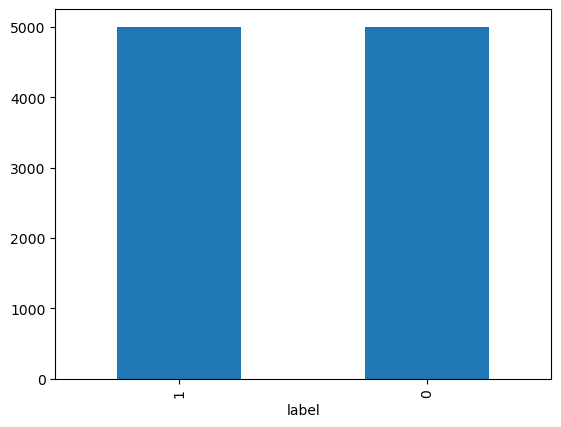

In [58]:
# Do label histogram
data['label'].value_counts().plot(kind='bar')

### Correlation Analysis between features and label (linear assumption)
I use Pearson Correlation Coefficient (PCC) to measure the dependence between variables.
This method to capture the linear (assumed) relationship between features and label.

In [59]:
coeffs_threshold = 0.2
linear_corr_features = []

def plot_corr_heatmap(data: pd.DataFrame, idx_start: int, idx_end: int) -> pd.DataFrame:
    '''
    Plot and return the correlation matrix
    '''
    idx_range = idx_end - idx_start
    labels = data['label']
    corr_data = data.iloc[:, idx_start:idx_end]
    corr_data['label'] = labels
    corr_coeffs = corr_data.corr()

    _, ax = plt.subplots(figsize=(idx_range,idx_range))
    sns.heatmap(corr_coeffs, annot=True, fmt='0.2f', ax=ax)
    plt.show()

    return corr_coeffs

def get_threshold_corr_features(data: pd.DataFrame, threshold: int) -> pd.DataFrame:
    '''
    Return features that has a correlation coefficients greater than `threshold`
    '''
    label_coor = data.loc['label']
    return label_coor[abs(label_coor) > threshold].drop('label').index.to_numpy()

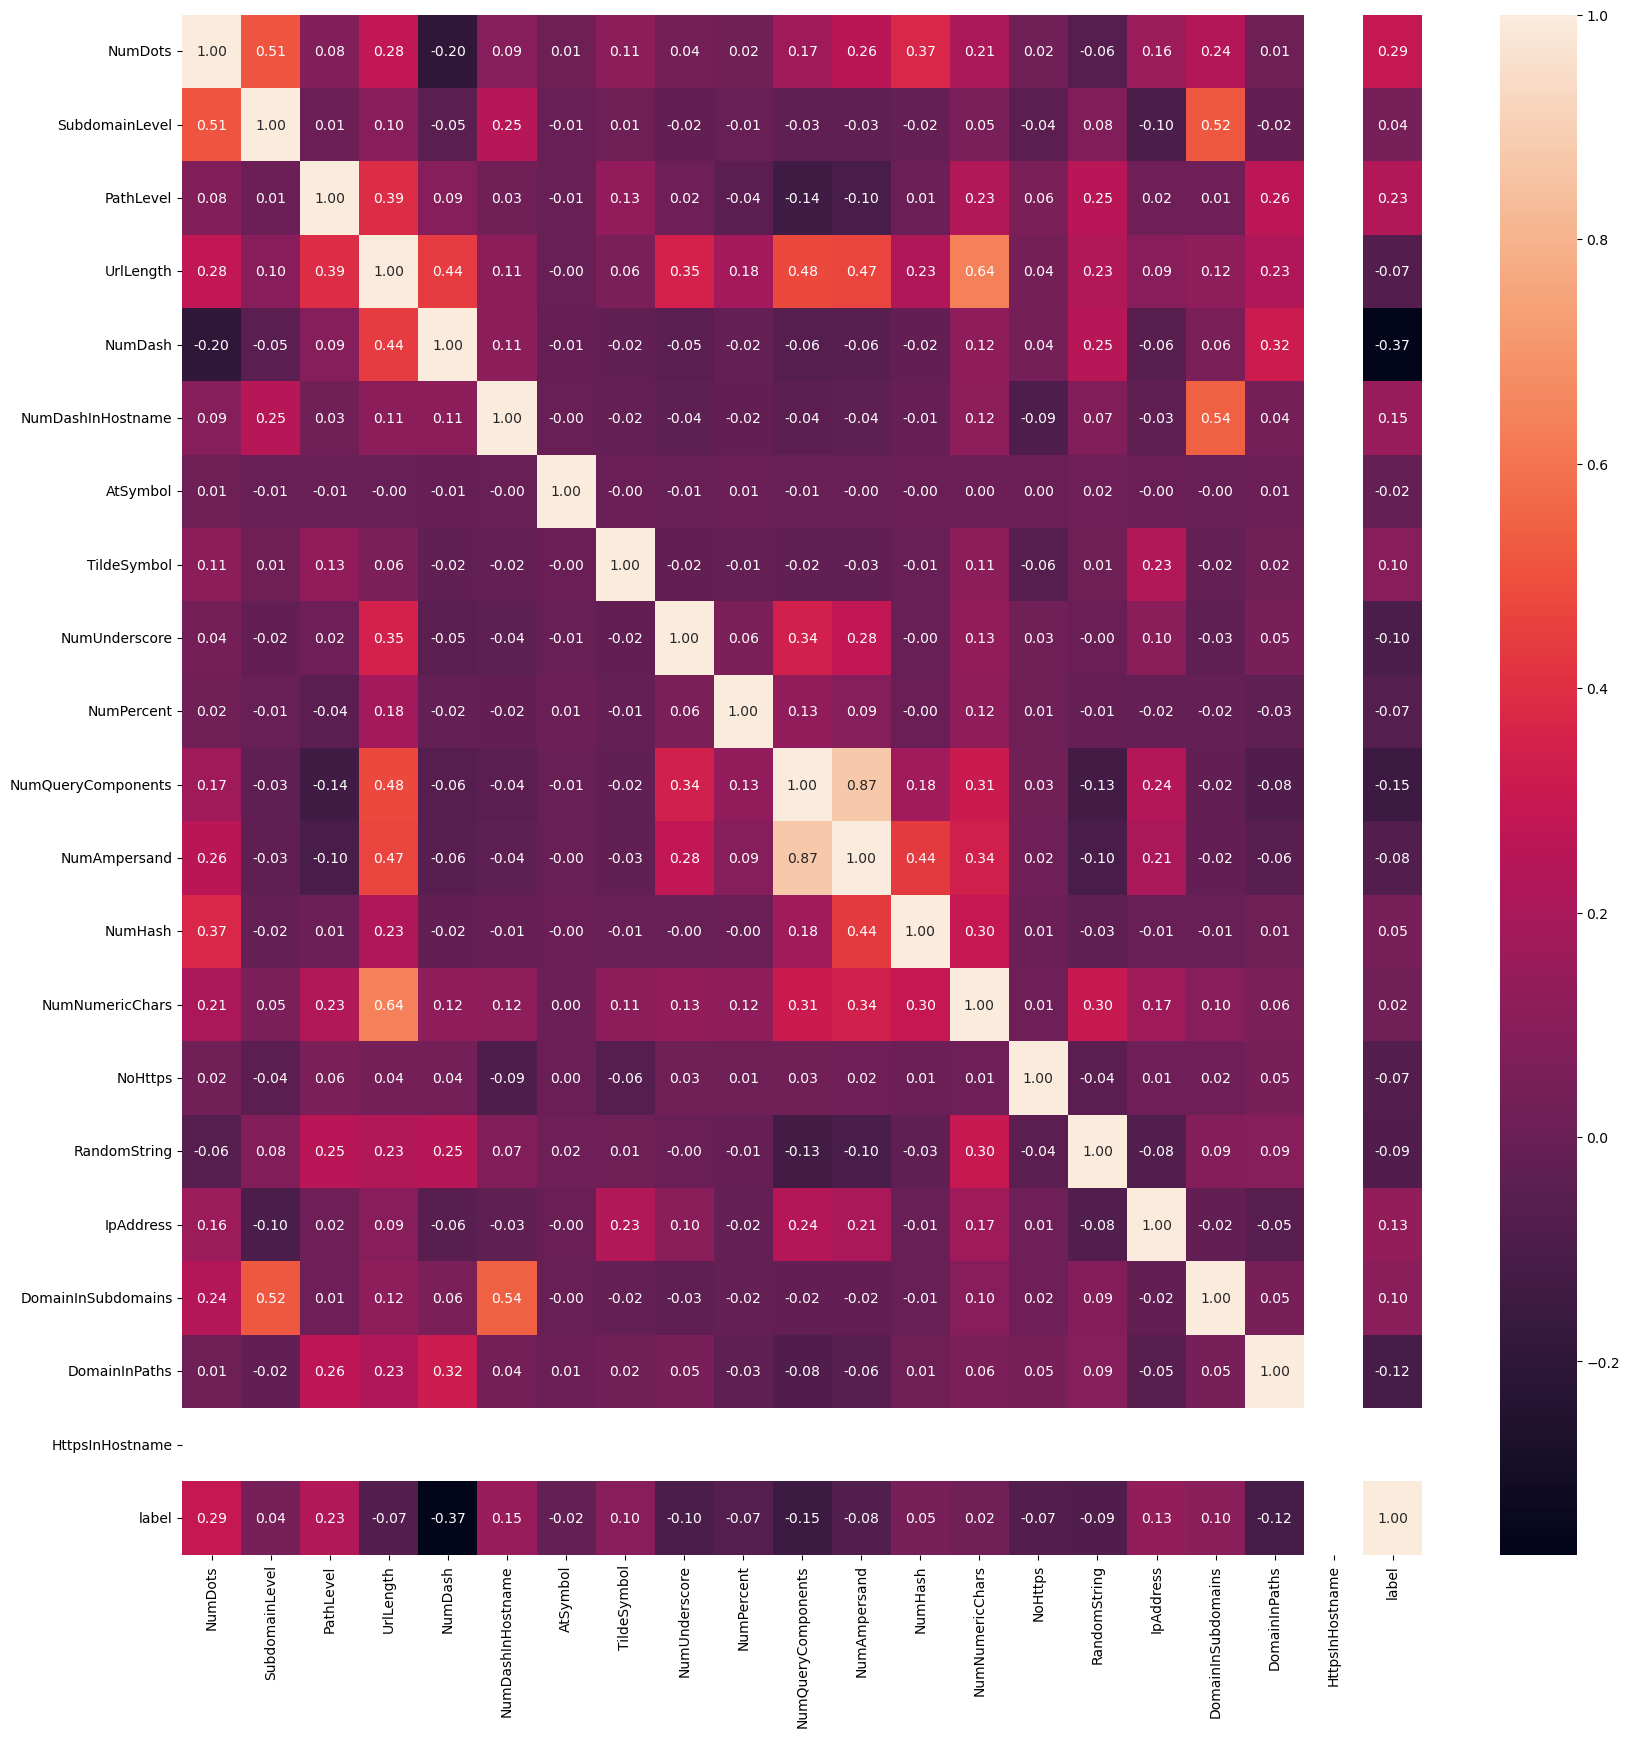

In [60]:
corr_coeffs = plot_corr_heatmap(data, 0, 20)
linear_corr_features.extend(get_threshold_corr_features(corr_coeffs, coeffs_threshold))


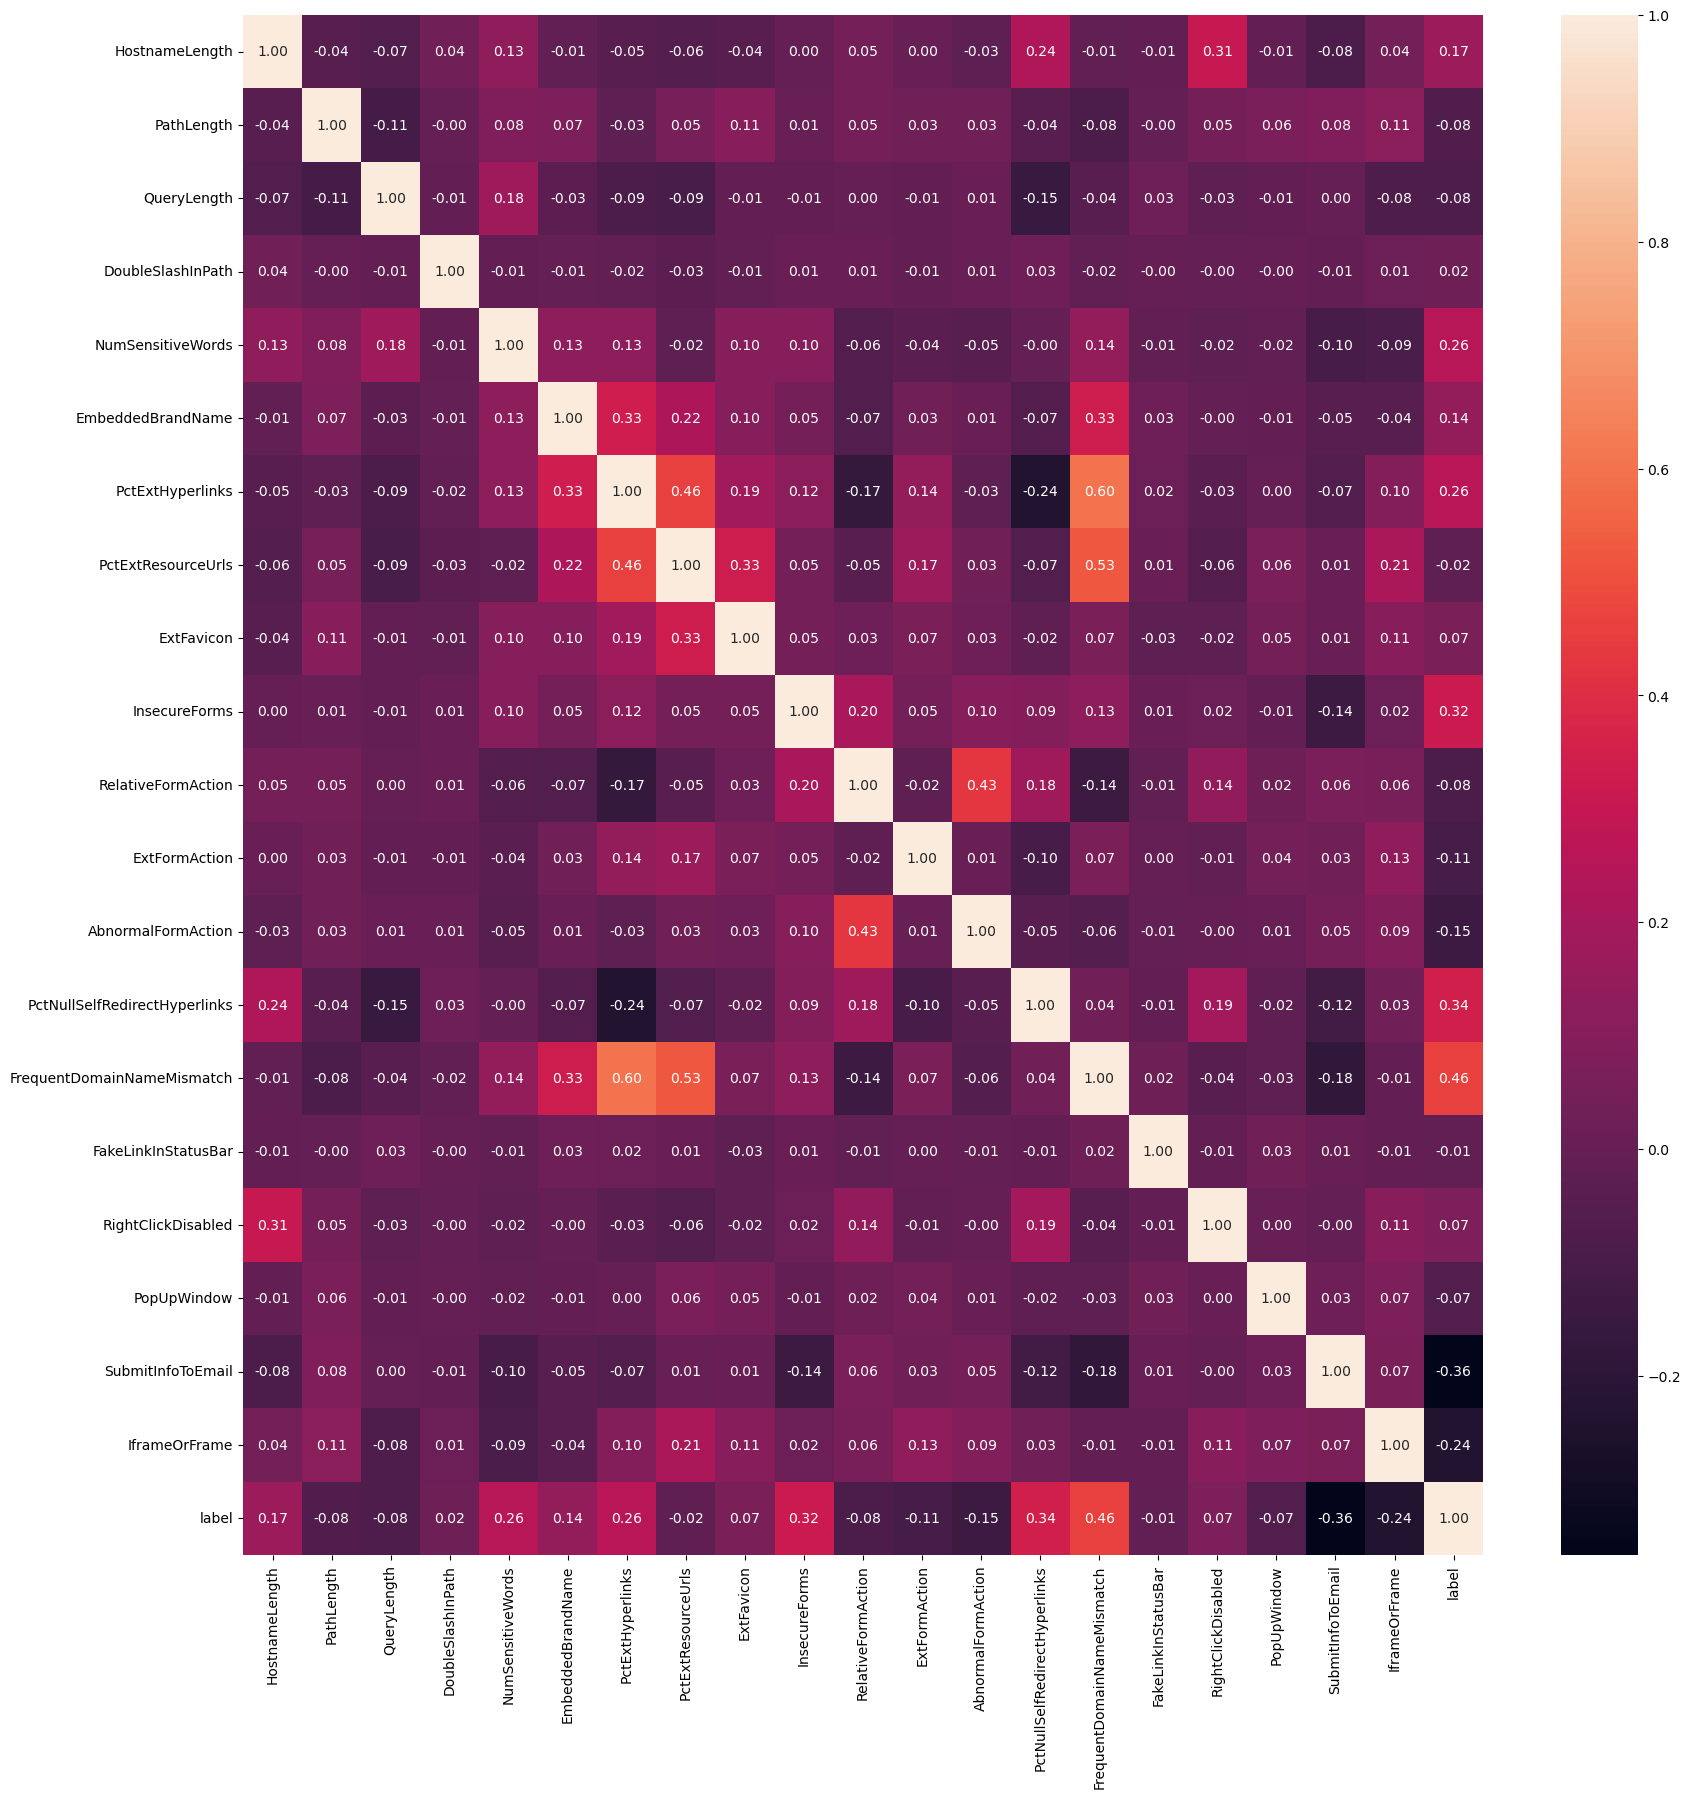

In [61]:
corr_coeffs = plot_corr_heatmap(data, 20, 40)
linear_corr_features.extend(get_threshold_corr_features(corr_coeffs, coeffs_threshold))


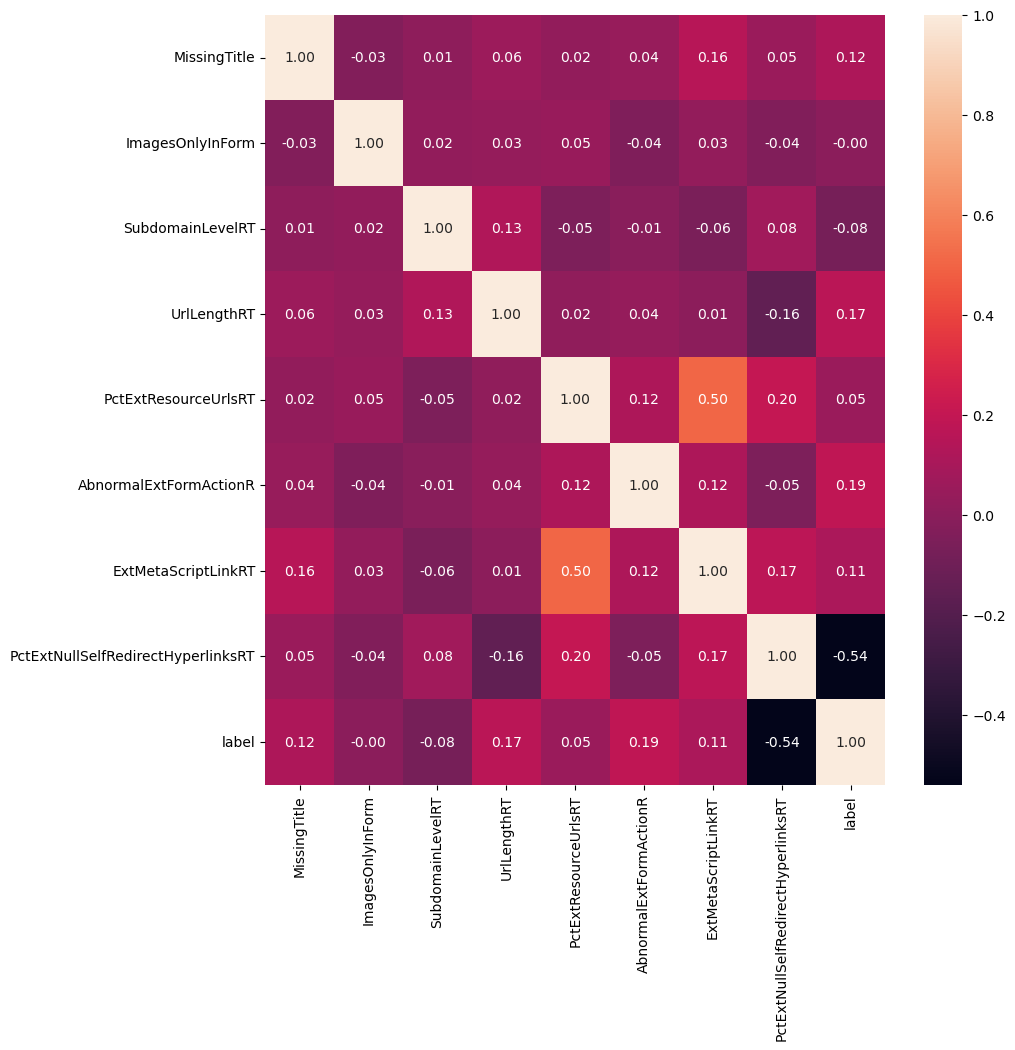

['NumDots', 'PathLevel', 'NumDash', 'NumSensitiveWords', 'PctExtHyperlinks', 'InsecureForms', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'SubmitInfoToEmail', 'IframeOrFrame', 'PctExtNullSelfRedirectHyperlinksRT']


In [62]:
corr_coeffs = plot_corr_heatmap(data, 40, 50)
linear_corr_features.extend(get_threshold_corr_features(corr_coeffs, coeffs_threshold))

print(linear_corr_features) # print out all features which have a correlation coefficient greater than `coeffs_threshold`

### Correlation Analysis between features and label (non-linear assumption)
Mutual information (MI) is used to measure the mutual dependence between variables. Unlike PCC above, MI
measures the general dependence, including non-linear relations

In [63]:
from sklearn.feature_selection import mutual_info_classif
X = data.drop(columns='label')
y = data['label']
discrete_features = X.dtypes == int

mi_scores = mutual_info_classif(X,y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Score', index=X.columns).sort_values(ascending=False)

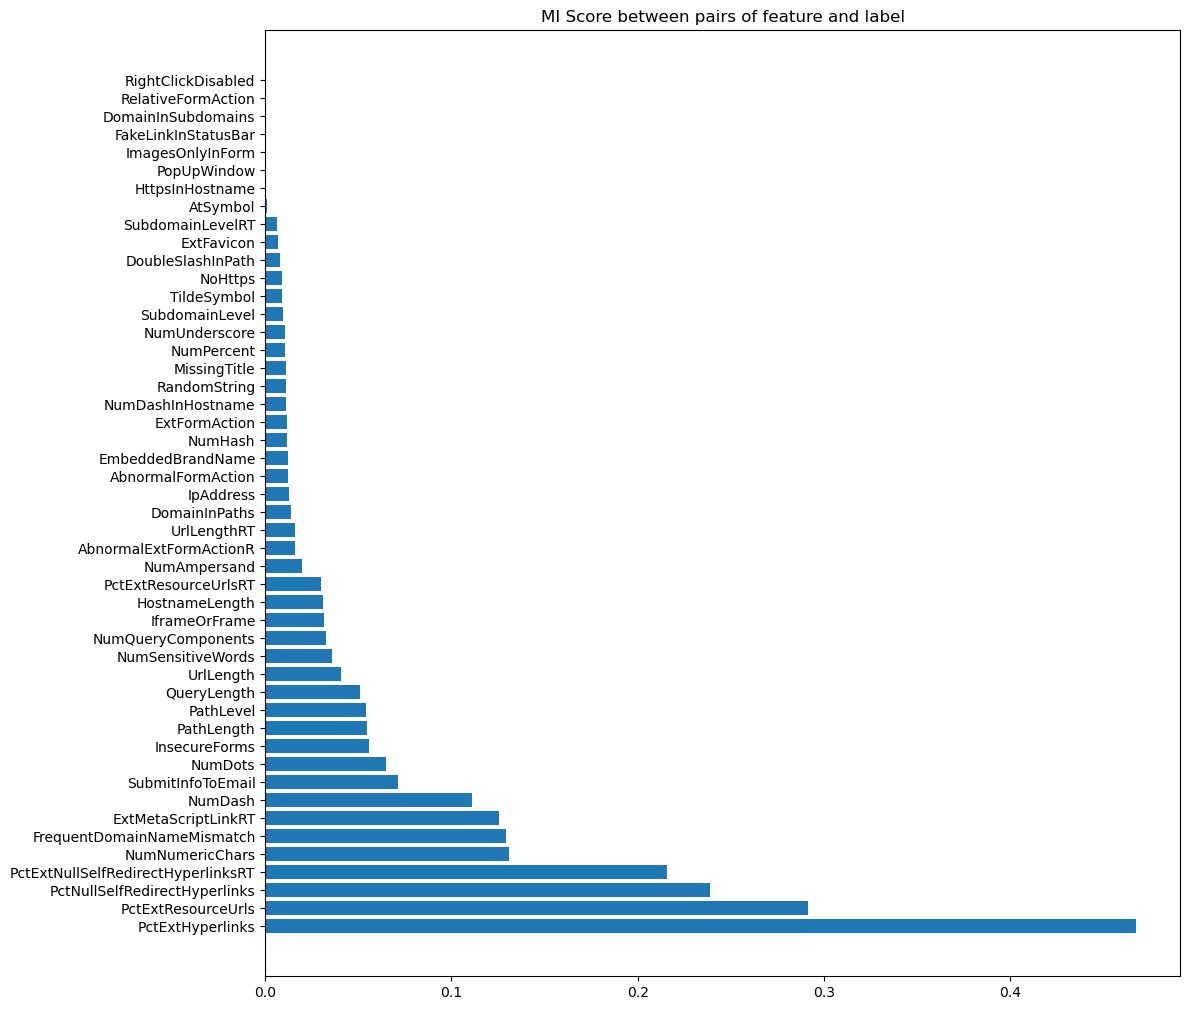

In [64]:
# Plot MI score bars for better visualization
fig = plt.figure(figsize=(12,10))


y_pos = np.arange(len(mi_scores))
feature_names = list(mi_scores.index)
plt.barh(y_pos, mi_scores)
plt.yticks(y_pos, feature_names)
plt.tight_layout()
plt.title('MI Score between pairs of feature and label')

plt.show()

In [65]:
# Select top 12 features which have the highest MI score
candidate_features = set([feature for feature in mi_scores[:15].index])

baseline_features = {
    'FrequentDomainNameMismatch',
    'PctExtNullSelfRedirectHyperlinksRT',
    'NumNumericChars',
    'PctExtHyperlinks',
    'NumDash',
    'PctNullSelfRedirectHyperlinks',
    'PctExtResourceUrls',
    'ExtMetaScriptLinkRT',
    'SubmitInfoToEmail',
    'NumSensitiveWords'
}

candidate_features = list(candidate_features.union(baseline_features))

for feature in candidate_features:
    print(feature)

print(len(candidate_features))

QueryLength
PathLength
PctExtHyperlinks
NumDash
UrlLength
InsecureForms
NumSensitiveWords
SubmitInfoToEmail
PctNullSelfRedirectHyperlinks
NumNumericChars
FrequentDomainNameMismatch
NumDots
ExtMetaScriptLinkRT
PctExtNullSelfRedirectHyperlinksRT
PathLevel
PctExtResourceUrls
16


### Still feature engineering
Now, I have a list of candidate features from the linear and non-linear high-correlated-to-label sets.
Next, I measure the relationship between chosen features, if some of them are linear-related to each other
maybe I will drop some of them or replace them by PCA.

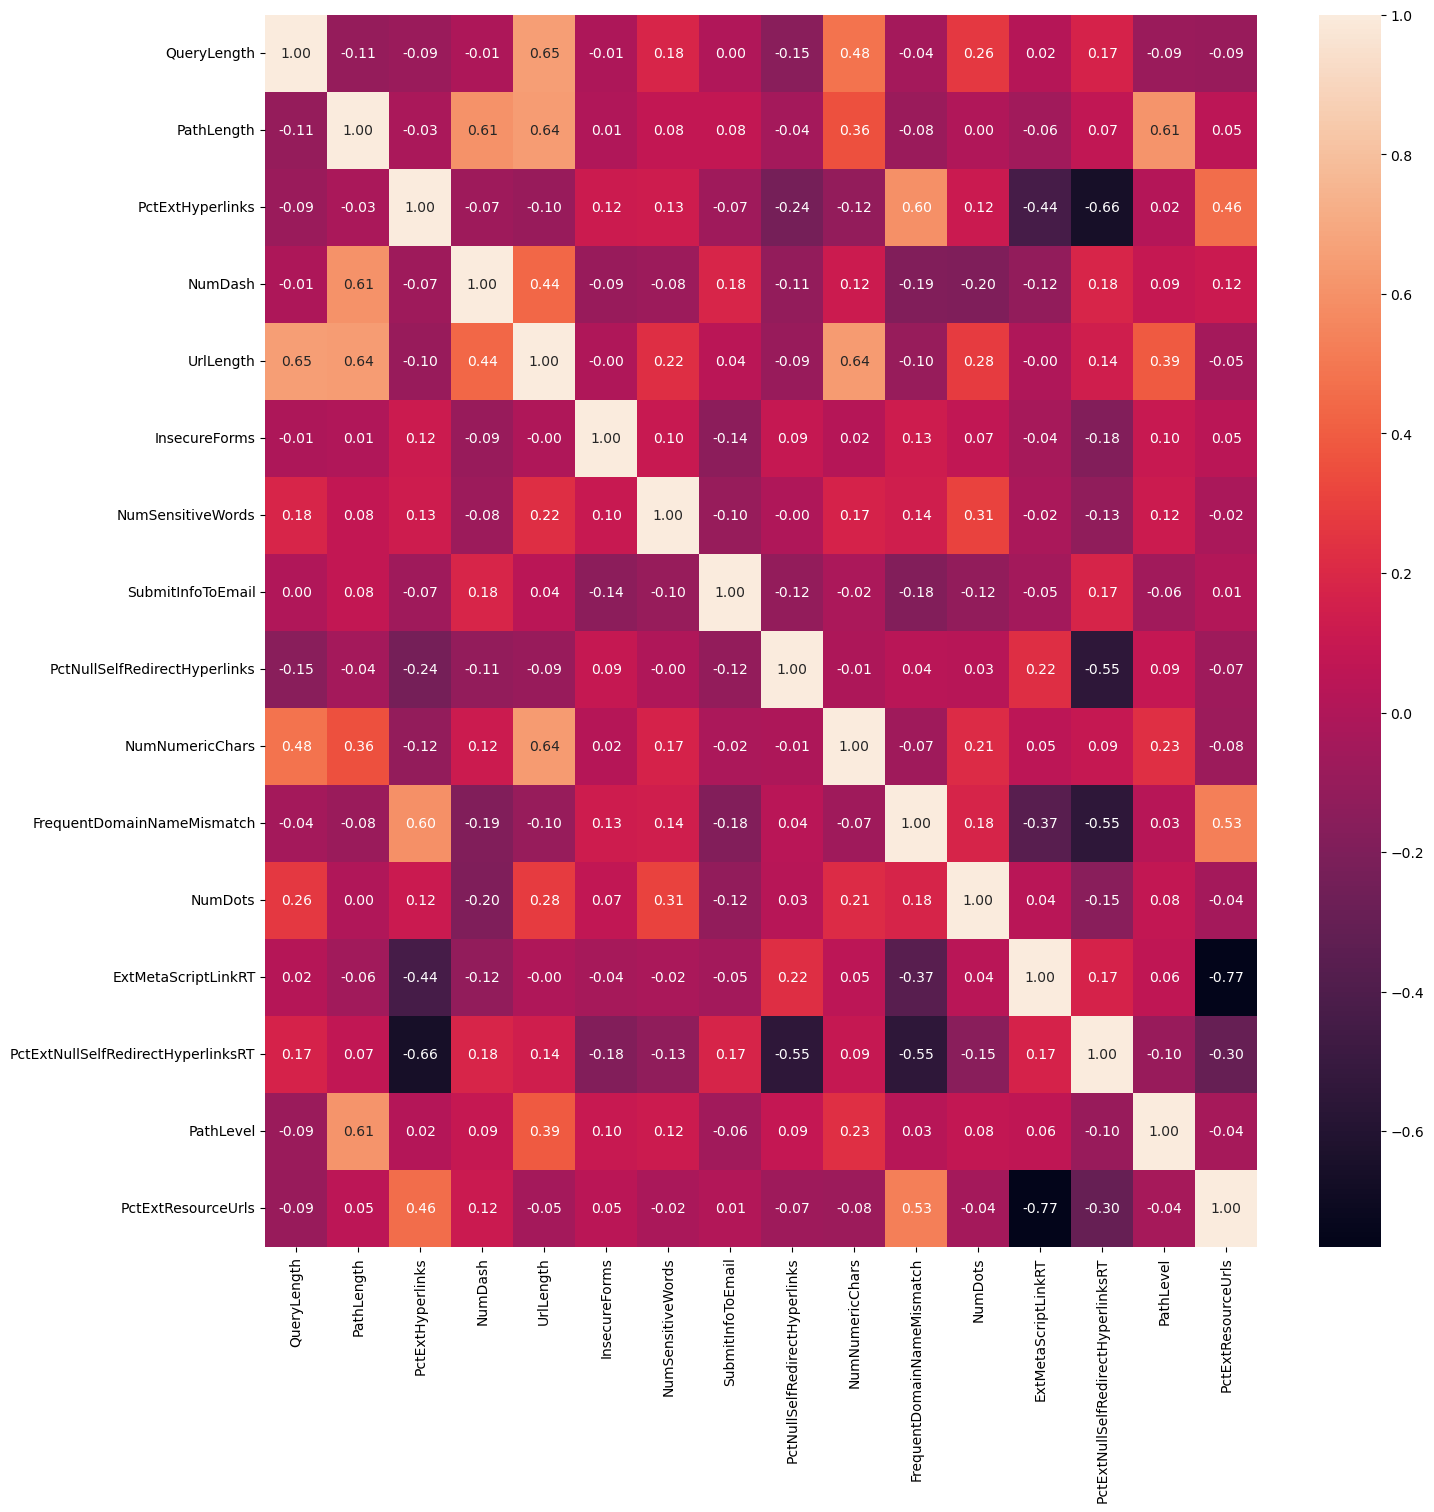

In [66]:
corr_data = data[candidate_features]
# corr_data.info()

_, ax = plt.subplots(figsize=(len(corr_data.columns),len(corr_data.columns)))
sns.heatmap(corr_data.corr(), annot=True, fmt='0.2f', ax=ax)
plt.show()

## Training and Testing

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Logistic Regression Classifier

In [68]:
def generate_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    # visualize the confusion matrix
    ax = plt.subplot()
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title('Confusion Matrix', fontsize=15)
    return conf_matrix


In [69]:
RANDOM_SEED = 42

X = data[candidate_features].to_numpy()
y = data['label']

# Split the dataset into 3 subsets: training, validation, and testing following the ratio of
# 70%, 15%, and 15% respectively
# Split the dataset into training and validation/testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)
# Split into validation/hyperparameter-tuning and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=RANDOM_SEED, stratify=y_val)

In [70]:
clf_log = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
}

grid_search = GridSearchCV(clf_log, param_grid, cv=5)

grid_search.fit(X_train,y_train)

print(f'Best params: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

clf_log = grid_search.best_estimator_

/home/cuong/anaconda3/envs/data-mining-course/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cuong/anaconda3/envs/data-mining-course/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cuong/anaconda3/envs/data-mining-course/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cuong/anaconda3/envs/data-mining-course/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cuong/anaconda3/envs/data-mining-course/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.917


              precision    recall  f1-score   support

  legitimate       0.93      0.92      0.92       750
    phishing       0.92      0.93      0.93       750

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



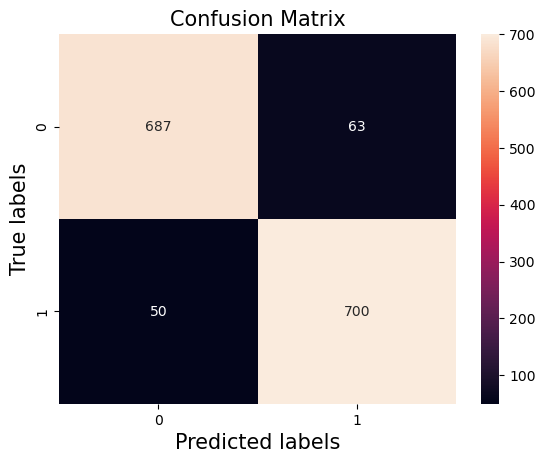

In [71]:
y_pred = clf_log.predict(X_val)


conf_matrix = generate_confusion_matrix(y_val, y_pred)
# Looking for low false positive as in this case false positive means that
# the probability of a phishing website is predicted as a legitimate website
print(classification_report(y_val, y_pred, target_names=['legitimate', 'phishing']))

### Random Forest Classifier

In [72]:
clf_rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'criterion': ['gini']
}

grid_search = GridSearchCV(clf_rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best params: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

clf_rf = grid_search.best_estimator_


Best params: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Best score: 0.9754285714285714


              precision    recall  f1-score   support

  legitimate       0.99      0.98      0.98       750
    phishing       0.98      0.99      0.98       750

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



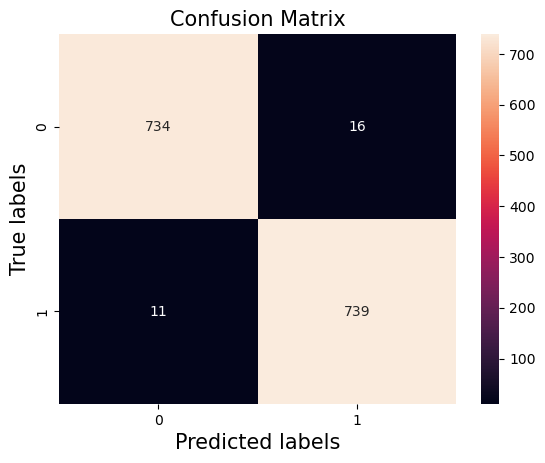

In [73]:
y_pred = clf_rf.predict(X_val)

conf_matrix = generate_confusion_matrix(y_val, y_pred)
# Looking for low false positive as in this case false positive means that
# the probability of a phishing website is predicted as a legitimate website
print(classification_report(y_val, y_pred, target_names=['legitimate', 'phishing']))

### Compare two methods on the test set

Do phishing detection on the test set using Random Forest
              precision    recall  f1-score   support

  legitimate       0.98      0.98      0.98       750
    phishing       0.98      0.98      0.98       750

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



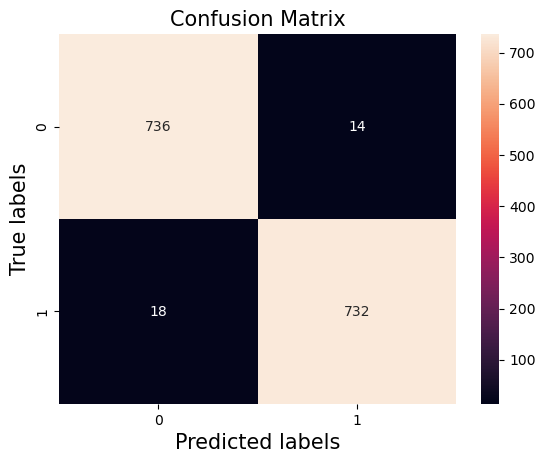

In [74]:
# As you can see here, RandomForest outperforms LogisticRegression so I chose RandomForest as a final classifier.
print("Do phishing detection on the test set using Random Forest")
y_pred = clf_rf.predict(X_test)
conf_matrix = generate_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['legitimate', 'phishing']))

Do phishing detection on the test set using Logistic Regression


              precision    recall  f1-score   support

  legitimate       0.92      0.94      0.93       750
    phishing       0.94      0.92      0.93       750

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500



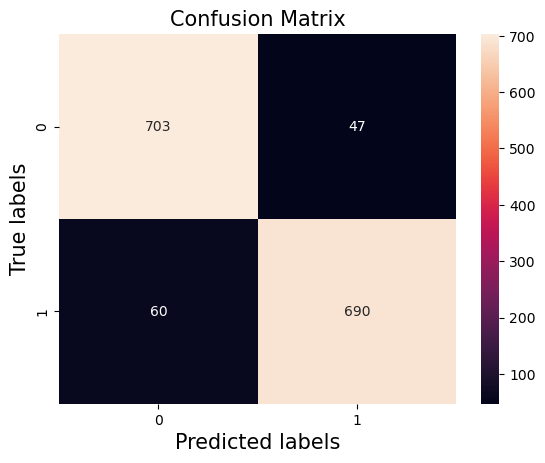

In [75]:
print("Do phishing detection on the test set using Logistic Regression")
y_pred = clf_log.predict(X_test)
conf_matrix = generate_confusion_matrix(y_test, y_pred)
# Looking for low false positive as in this case false positive means that
# the probability of a phishing website is predicted as a legitimate website
print(classification_report(y_test, y_pred, target_names=['legitimate', 'phishing']))

### Compare `candidate_features` and `baseline_features` approach on the whole dataset

              precision    recall  f1-score   support

  legitimate       0.99      0.99      0.99      5000
    phishing       0.99      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



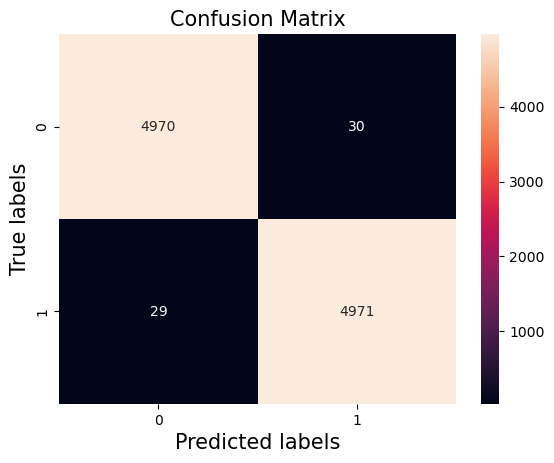

In [76]:
# Predict on the wholedataset using 'candidate features'
X = data[candidate_features].to_numpy()
y = data['label'].to_numpy()

y_pred = clf_rf.predict(X)
print(classification_report(y, y_pred, target_names=['legitimate', 'phishing']))
conf_matrix = generate_confusion_matrix(y, y_pred)


In [77]:
# Only use baseline features to train the RandomForest Classifier
X = data[list(baseline_features)].to_numpy()
y = data['label'].to_numpy()

# Split the dataset into training and validation/testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)
# Split into validation/hyperparameter-tuning and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=RANDOM_SEED, stratify=y_val)

print(f'Best params: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best params: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Best score: 0.9754285714285714


In [78]:
best_params = grid_search.best_params_

clf_rf_baseline = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                          max_depth=best_params['max_depth'],
                                          criterion=best_params['criterion'])
clf_rf_baseline.fit(X_train, y_train)

y_pred = clf_rf_baseline.predict(X_val)
print(classification_report(y_val, y_pred, target_names=['legitimate', 'phishing']))

              precision    recall  f1-score   support

  legitimate       0.98      0.95      0.96       750
    phishing       0.95      0.98      0.97       750

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



              precision    recall  f1-score   support

  legitimate       0.97      0.96      0.97       750
    phishing       0.96      0.97      0.97       750

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



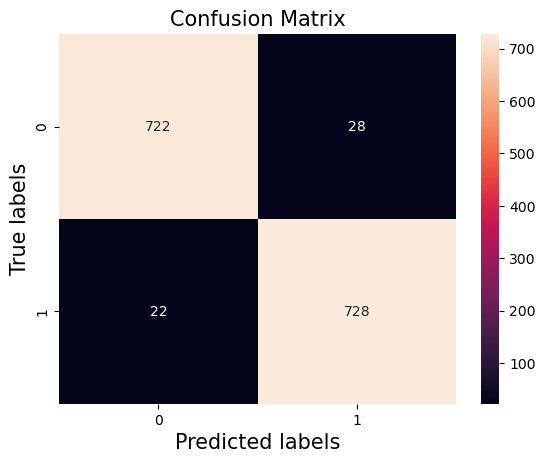

In [79]:
# Predict on the test set | baseline features approach
y_pred = clf_rf_baseline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['legitimate', 'phishing']))
conf_matrix = generate_confusion_matrix(y_test, y_pred)

